In [56]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler


file_path = "Original_Data_Wave_7.csv"   
df = pd.read_csv(file_path, low_memory=False)  

print(df.info())
print(df.head())
print(f"Dataset Shape: {df.shape}") 

print(df.columns)
print(df.head())

df.isnull().sum().sort_values(ascending=False)

latin_american_countries = [   #countries from latin america included in wave 7
    
 "ARG", "BOL", "BRA", "CHL", "COL", "ECU", "GTM", "MEX", "NIC", "PER", "PRI", "URY", "VEN"
 ]

df = df[df['B_COUNTRY_ALPHA'].isin(latin_american_countries)]

print(df)


selected_columns = [          #questions carefully selected after studying the survey completely and literature review
    'A_STUDY', 'A_YEAR', 'B_COUNTRY_ALPHA', 'S025',   # General questions
    'Q57P', 'Q58P', 'Q59P',  'Q60P',   'Q61P',   'Q62P',   'Q63P',  # Interpersonal trust questions
    'Q66P', 'Q67P', 'Q69P',  'Q71P',   'Q72P',   'Q75P',   'Q78P',  # Institutional trust questions
    'Q201P', 'Q202P', 'Q203P',  'Q204P',   'Q205P',   'Q206P',   'Q207P',  # Social media usage questions
    'Q208P', 'Q255P', 'Q256P','Q257P' ,'Q258P','Q259P','Q263', #Independent questions   *maybe to be added to the study* 
    'Q240', #Polarization questions 
    'Q260', 'Q262', #Demographic questions
         
]

df_filtered = df[selected_columns]

print(df_filtered)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97220 entries, 0 to 97219
Columns: 611 entries, version to v2xps_party
dtypes: float64(195), int64(404), object(12)
memory usage: 453.2+ MB
None
              version                        doi  A_WAVE  A_YEAR  A_STUDY  \
0  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
1  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
2  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
3  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   
4  6-0-0 (2024-04-30)  doi.org/10.14281/18241.24       7    2019        2   

   B_COUNTRY B_COUNTRY_ALPHA  C_COW_NUM C_COW_ALPHA  D_INTERVIEW  ...  \
0        196             CYP        352         CYP    196070011  ...   
1        196             CYP        352         CYP    196070036  ...   
2        196             CYP        352         CYP    196070039  ...   
3        196             CYP        352         CY

In [57]:
rename_columns = {
    'A_STUDY':'a_study',
    'A_YEAR':'a_year',
    'B_COUNTRY_ALPHA' : 'country',
    'S025': 's025',
    'Q57P':'Q57_trust_people',
    'Q58P': 'Q58_trust_family',
    'Q59P': 'Q59_trust_neighborhood',
    'Q60P': 'Q60_trust_friends',     
    'Q61P': 'Q61_trust_new_people',
    'Q62P': 'Q62_trust_people_another_religion',
    'Q63P': 'Q63_trust_foreigners',
    'Q66P': 'Q66_confidence_press',
    'Q67P': 'Q67_confidence_television',
    'Q69P': 'Q69_confidence_police',
    'Q71P': 'Q71_confidence_government',
    'Q72P': 'Q72_confidence_politicalparties',
    'Q75P': 'Q75_confidence_universities',
    'Q76P': 'Q76_confidence_elections',
    'Q77P': 'Q77_confidence_majorcompanies',
    'Q78P': 'Q78_confidence_banks',
    'Q201P':'Q201_consume_dailynewspaper',
    'Q202P':'Q202_consume_TVnews',
    'Q203P':'Q203_consume_radionews',
    'Q204P':'Q204_consume_mobilephone',
    'Q205P':'Q205_consume_email',
    'Q206P': 'Q206_consume_internet',
    'Q207P': 'Q207_consume_socialmedia',
    'Q208P': 'Q208_talk_with_friends_colleagues',
    'Q217P': 'Q217_search_information_politics',
    'Q240': 'Q240_placement_left_right',
    'Q255P': 'Q255_closeness_city',
    'Q256P': 'Q256_closeness_region',
    'Q257P': 'Q257_closeness_country',
    'Q258P': 'Q258_closeness_Latam',
    'Q259P': 'Q259_closeness_World',
    'Q260': 'Q260_gender',
    'Q262': 'Q262_age',
    'Q263': 'Q263_native_Inmigrant',
}

df_filtered.rename(columns=rename_columns, inplace=True)

print(df_filtered.columns)


Index(['a_study', 'a_year', 'country', 's025', 'Q57_trust_people',
       'Q58_trust_family', 'Q59_trust_neighborhood', 'Q60_trust_friends',
       'Q61_trust_new_people', 'Q62_trust_people_another_religion',
       'Q63_trust_foreigners', 'Q66_confidence_press',
       'Q67_confidence_television', 'Q69_confidence_police',
       'Q71_confidence_government', 'Q72_confidence_politicalparties',
       'Q75_confidence_universities', 'Q78_confidence_banks',
       'Q201_consume_dailynewspaper', 'Q202_consume_TVnews',
       'Q203_consume_radionews', 'Q204_consume_mobilephone',
       'Q205_consume_email', 'Q206_consume_internet',
       'Q207_consume_socialmedia', 'Q208_talk_with_friends_colleagues',
       'Q255_closeness_city', 'Q256_closeness_region',
       'Q257_closeness_country', 'Q258_closeness_Latam',
       'Q259_closeness_World', 'Q263_native_Inmigrant',
       'Q240_placement_left_right', 'Q260_gender', 'Q262_age'],
      dtype='object')


C:\Users\carme\AppData\Local\Temp\ipykernel_14620\2788891895.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns=rename_columns, inplace=True)


In [58]:
missing_values = [-1, -2, -3, -5]   #Q240 is the one with the highest missing codes
df_filtered.replace(missing_values, np.nan, inplace=True)

df_filtered.isnull().sum()

C:\Users\carme\AppData\Local\Temp\ipykernel_14620\3564121889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.replace(missing_values, np.nan, inplace=True)


a_study                                 0
a_year                                  0
country                                 0
s025                                    0
Q57_trust_people                      175
Q58_trust_family                       39
Q59_trust_neighborhood                112
Q60_trust_friends                      93
Q61_trust_new_people                  128
Q62_trust_people_another_religion     669
Q63_trust_foreigners                  664
Q66_confidence_press                  228
Q67_confidence_television             124
Q69_confidence_police                  82
Q71_confidence_government             175
Q72_confidence_politicalparties       184
Q75_confidence_universities           387
Q78_confidence_banks                  262
Q201_consume_dailynewspaper           148
Q202_consume_TVnews                   117
Q203_consume_radionews                149
Q204_consume_mobilephone              169
Q205_consume_email                    271
Q206_consume_internet             

In [59]:
numerical_stats = df_filtered.describe()

print(numerical_stats)


       a_study        a_year          s025  Q57_trust_people  \
count  17439.0  17439.000000  1.743900e+04      17264.000000   
mean       2.0   2018.536613  3.628074e+06          1.104611   
std        0.0      1.406047  2.769645e+06          0.306060   
min        2.0   2017.000000  3.220170e+05          1.000000   
25%        2.0   2018.000000  7.620180e+05          1.000000   
50%        2.0   2018.000000  3.202020e+06          1.000000   
75%        2.0   2020.000000  6.042018e+06          1.000000   
max        2.0   2022.000000  8.622021e+06          2.000000   

       Q58_trust_family  Q59_trust_neighborhood  Q60_trust_friends  \
count      17400.000000            17327.000000       17346.000000   
mean           3.557529                2.453281           2.596622   
std            0.731199                0.922106           0.896891   
min            1.000000                1.000000           1.000000   
25%            3.000000                2.000000           2.000000   
50%

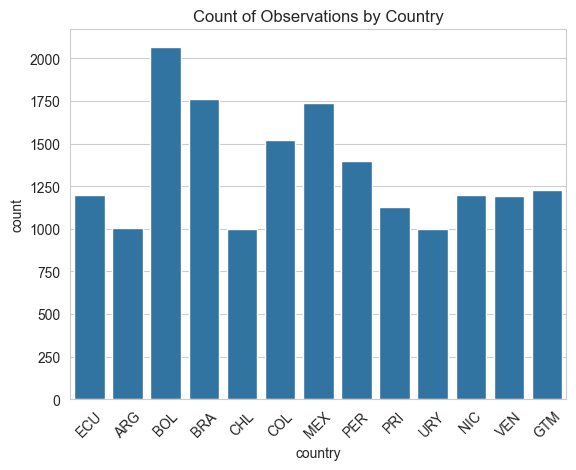

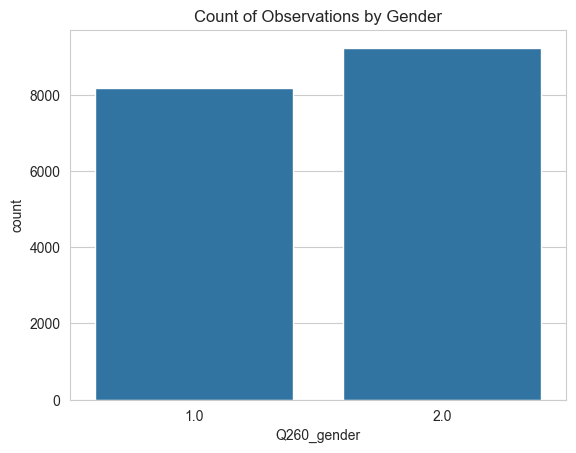

In [60]:

sns.countplot(x='country', data=df_filtered)
plt.title("Count of Observations by Country")
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='Q260_gender', data=df_filtered)
plt.title("Count of Observations by Gender")
plt.show()


In [61]:

countries_names = {
    'ECU': 'Ecuador',
    'ARG': 'Argentina',
    'BOL': 'Bolivia',
    'BRA': 'Brazil',
    'CHL': 'Chile',
    'COL': 'Colombia',
    'MEX': 'Mexico',
    'PER': 'Peru',
    'PRI': 'Paraguay',
    'URY': 'Uruguay',
    'NIC': 'Nicaragua',
    'VEN': 'Venezuela',
    'GTM': 'Guatemala'
    
}

df_filtered['country_name'] = df_filtered['country'].map(countries_names)

print(df_filtered[['country', 'country_name']].head())

df_filtered.reset_index(drop=True, inplace=True)

df_filtered



   country country_name
22     ECU      Ecuador
23     ECU      Ecuador
24     ECU      Ecuador
25     ECU      Ecuador
26     ECU      Ecuador


C:\Users\carme\AppData\Local\Temp\ipykernel_14620\329068772.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['country_name'] = df_filtered['country'].map(countries_names)


,a_study,a_year,country,s025,Q57_trust_people,Q58_trust_family,Q59_trust_neighborhood,Q60_trust_friends,Q61_trust_new_people,Q62_trust_people_another_religion,...,Q255_closeness_city,Q256_closeness_region,Q257_closeness_country,Q258_closeness_Latam,Q259_closeness_World,Q263_native_Inmigrant,Q240_placement_left_right,Q260_gender,Q262_age,country_name
0,2,2018,ECU,2182018,1.0,4.0,3.0,3.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,5.0,1.0,27.0,Ecuador
1,2,2018,ECU,2182018,1.0,4.0,3.0,3.0,1.0,1.0,...,4.0,4.0,4.0,3.0,2.0,1.0,5.0,1.0,55.0,Ecuador
2,2,2018,ECU,2182018,1.0,4.0,1.0,3.0,2.0,3.0,...,4.0,4.0,4.0,4.0,4.0,1.0,5.0,2.0,23.0,Ecuador
3,2,2018,ECU,2182018,1.0,4.0,1.0,1.0,2.0,2.0,...,3.0,3.0,3.0,3.0,3.0,1.0,5.0,1.0,37.0,Ecuador
4,2,2018,ECU,2182018,1.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,4.0,4.0,2.0,1.0,5.0,1.0,42.0,Ecuador
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17434,2,2021,VEN,8622021,2.0,4.0,3.0,4.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,1.0,9.0,1.0,69.0,Venezuela
17435,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,2.0,2.0,...,3.0,3.0,4.0,4.0,4.0,1.0,10.0,2.0,23.0,Venezuela
17436,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,1.0,1.0,...,4.0,4.0,3.0,3.0,3.0,1.0,5.0,2.0,18.0,Venezuela
17437,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,2.0,2.0,...,3.0,3.0,4.0,4.0,4.0,1.0,7.0,2.0,52.0,Venezuela


C:\Users\carme\AppData\Local\Temp\ipykernel_14620\3454783711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['gender_label'] = df_filtered['Q260_gender'].replace({1: 'Male', 2: 'Female'})


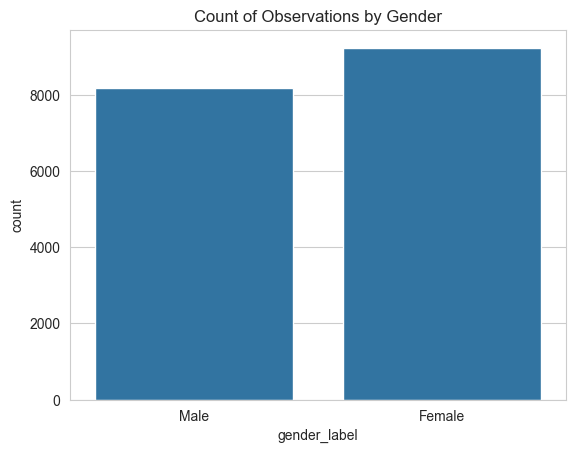

In [62]:

df_filtered['gender_label'] = df_filtered['Q260_gender'].replace({1: 'Male', 2: 'Female'})


sns.countplot(x='gender_label', data=df_filtered)
plt.title("Count of Observations by Gender")
plt.show()


In [63]:

df_filtered.info()

df_filtered['citizen_type'] = df_filtered['Q263_native_Inmigrant'].map({
    1.0: 'Native',
    2.0: 'Inmigrant',
})

df_filtered

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17439 entries, 0 to 17438
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   a_study                            17439 non-null  int64  
 1   a_year                             17439 non-null  int64  
 2   country                            17439 non-null  object 
 3   s025                               17439 non-null  int64  
 4   Q57_trust_people                   17264 non-null  float64
 5   Q58_trust_family                   17400 non-null  float64
 6   Q59_trust_neighborhood             17327 non-null  float64
 7   Q60_trust_friends                  17346 non-null  float64
 8   Q61_trust_new_people               17311 non-null  float64
 9   Q62_trust_people_another_religion  16770 non-null  float64
 10  Q63_trust_foreigners               16775 non-null  float64
 11  Q66_confidence_press               17211 non-null  flo

C:\Users\carme\AppData\Local\Temp\ipykernel_14620\500780831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['citizen_type'] = df_filtered['Q263_native_Inmigrant'].map({


,a_study,a_year,country,s025,Q57_trust_people,Q58_trust_family,Q59_trust_neighborhood,Q60_trust_friends,Q61_trust_new_people,Q62_trust_people_another_religion,...,Q257_closeness_country,Q258_closeness_Latam,Q259_closeness_World,Q263_native_Inmigrant,Q240_placement_left_right,Q260_gender,Q262_age,country_name,gender_label,citizen_type
0,2,2018,ECU,2182018,1.0,4.0,3.0,3.0,2.0,2.0,...,2.0,2.0,1.0,1.0,5.0,1.0,27.0,Ecuador,Male,Native
1,2,2018,ECU,2182018,1.0,4.0,3.0,3.0,1.0,1.0,...,4.0,3.0,2.0,1.0,5.0,1.0,55.0,Ecuador,Male,Native
2,2,2018,ECU,2182018,1.0,4.0,1.0,3.0,2.0,3.0,...,4.0,4.0,4.0,1.0,5.0,2.0,23.0,Ecuador,Female,Native
3,2,2018,ECU,2182018,1.0,4.0,1.0,1.0,2.0,2.0,...,3.0,3.0,3.0,1.0,5.0,1.0,37.0,Ecuador,Male,Native
4,2,2018,ECU,2182018,1.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,2.0,1.0,5.0,1.0,42.0,Ecuador,Male,Native
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17434,2,2021,VEN,8622021,2.0,4.0,3.0,4.0,3.0,3.0,...,4.0,4.0,4.0,1.0,9.0,1.0,69.0,Venezuela,Male,Native
17435,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,2.0,2.0,...,4.0,4.0,4.0,1.0,10.0,2.0,23.0,Venezuela,Female,Native
17436,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,1.0,1.0,...,3.0,3.0,3.0,1.0,5.0,2.0,18.0,Venezuela,Female,Native
17437,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,2.0,2.0,...,4.0,4.0,4.0,1.0,7.0,2.0,52.0,Venezuela,Female,Native


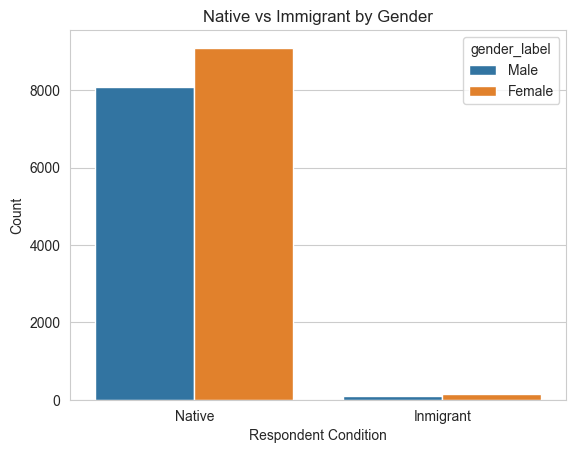

In [64]:
sns.countplot(x='citizen_type', hue='gender_label', data=df_filtered)
plt.title("Native vs Immigrant by Gender")
plt.xlabel("Respondent Condition")
plt.ylabel("Count")
plt.show()

In [65]:

age_unique = df_filtered['Q262_age'].unique()

print(age_unique)

df_filtered['age_group'] = pd.cut(df_filtered['Q262_age'], bins=[14,18, 29, 44, 59, 74, 100], 
                          labels=["18-", "18-29", "30-44", "45-59", "60-74", "75+"], right=False)

print(df_filtered['age_group'].value_counts())

df_filtered


[27. 55. 23. 37. 42. 53. 59. 63. 32. 46. 21. 73. 34. 49. 58. 30. 48. 41.
 51. 36. 35. 31. 22. 45. 62. 40. 68. 18. 66. 43. 28. 24. 54. 29. 39. 33.
 60. 57. 25. 64. 56. 52. 19. 61. 26. 38. 20. 75. 76. 67. 44. 70. 65. 80.
 50. 71. 17. 69. 47. 74. 78. 86. 87. 72. 77. 79. 84. 81. nan 94. 83. 85.
 82. 91. 88. 89. 16. 90. 92. 93.]
age_group
30-44    5188
18-29    4949
45-59    3974
60-74    2567
75+       629
18-       127
Name: count, dtype: int64


C:\Users\carme\AppData\Local\Temp\ipykernel_14620\3810614445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_group'] = pd.cut(df_filtered['Q262_age'], bins=[14,18, 29, 44, 59, 74, 100],


,a_study,a_year,country,s025,Q57_trust_people,Q58_trust_family,Q59_trust_neighborhood,Q60_trust_friends,Q61_trust_new_people,Q62_trust_people_another_religion,...,Q258_closeness_Latam,Q259_closeness_World,Q263_native_Inmigrant,Q240_placement_left_right,Q260_gender,Q262_age,country_name,gender_label,citizen_type,age_group
0,2,2018,ECU,2182018,1.0,4.0,3.0,3.0,2.0,2.0,...,2.0,1.0,1.0,5.0,1.0,27.0,Ecuador,Male,Native,18-29
1,2,2018,ECU,2182018,1.0,4.0,3.0,3.0,1.0,1.0,...,3.0,2.0,1.0,5.0,1.0,55.0,Ecuador,Male,Native,45-59
2,2,2018,ECU,2182018,1.0,4.0,1.0,3.0,2.0,3.0,...,4.0,4.0,1.0,5.0,2.0,23.0,Ecuador,Female,Native,18-29
3,2,2018,ECU,2182018,1.0,4.0,1.0,1.0,2.0,2.0,...,3.0,3.0,1.0,5.0,1.0,37.0,Ecuador,Male,Native,30-44
4,2,2018,ECU,2182018,1.0,3.0,3.0,3.0,3.0,3.0,...,4.0,2.0,1.0,5.0,1.0,42.0,Ecuador,Male,Native,30-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17434,2,2021,VEN,8622021,2.0,4.0,3.0,4.0,3.0,3.0,...,4.0,4.0,1.0,9.0,1.0,69.0,Venezuela,Male,Native,60-74
17435,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,2.0,2.0,...,4.0,4.0,1.0,10.0,2.0,23.0,Venezuela,Female,Native,18-29
17436,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,1.0,1.0,...,3.0,3.0,1.0,5.0,2.0,18.0,Venezuela,Female,Native,18-29
17437,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,2.0,2.0,...,4.0,4.0,1.0,7.0,2.0,52.0,Venezuela,Female,Native,45-59


In [66]:

unique_values = {col: df_filtered[col].unique() for col in df_filtered.columns}
for col, values in unique_values.items():
    print(f"Column: {col}")
    print(f"Unique values: {values}\n")
    
    


Column: a_study
Unique values: [2]

Column: a_year
Unique values: [2018 2017 2022 2020 2021]

Column: country
Unique values: ['ECU' 'ARG' 'BOL' 'BRA' 'CHL' 'COL' 'MEX' 'PER' 'PRI' 'URY' 'NIC' 'VEN'
 'GTM']

Column: s025
Unique values: [2182018  322017  682017  762018 1522018 1702018 4842018 6042018 6302018
 8582022 5582020 8622021 3202020]

Column: Q57_trust_people
Unique values: [ 1.  2. nan]

Column: Q58_trust_family
Unique values: [ 4.  3.  1.  2. nan]

Column: Q59_trust_neighborhood
Unique values: [ 3.  1.  4.  2. nan]

Column: Q60_trust_friends
Unique values: [ 3.  1.  4.  2. nan]

Column: Q61_trust_new_people
Unique values: [ 2.  1.  3.  4. nan]

Column: Q62_trust_people_another_religion
Unique values: [ 2.  1.  3.  4. nan]

Column: Q63_trust_foreigners
Unique values: [ 2.  1.  3.  4. nan]

Column: Q66_confidence_press
Unique values: [ 3.  2.  1.  4. nan]

Column: Q67_confidence_television
Unique values: [ 3.  2.  1.  4. nan]

Column: Q69_confidence_police
Unique values: [ 3.  2.

In [67]:
#Social Trust Index
df_filtered['Q57_trust_question_rescaled'] = df_filtered['Q57_trust_people'].map({1: 1, 2: 4, np.nan: np.nan})  # Rescale the 1-2 question to match the 1-4 scale

trust_columns = [
    'Q57_trust_question_rescaled', 'Q58_trust_family', 'Q59_trust_neighborhood', 'Q60_trust_friends', 
    'Q61_trust_new_people', 'Q62_trust_people_another_religion', 'Q63_trust_foreigners'
]
df_filtered['social_trust_index'] = df_filtered[trust_columns].mean(axis=1, skipna=True)  # Create the Social Trust Index (mean of trust-related questions)

print(df_filtered[['social_trust_index']].describe())


df_filtered



       social_trust_index
count        17432.000000
mean             2.260969
std              0.560389
min              1.000000
25%              1.857143
50%              2.285714
75%              2.571429
max              4.000000


C:\Users\carme\AppData\Local\Temp\ipykernel_14620\3677156975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Q57_trust_question_rescaled'] = df_filtered['Q57_trust_people'].map({1: 1, 2: 4, np.nan: np.nan})  # Rescale the 1-2 question to match the 1-4 scale
C:\Users\carme\AppData\Local\Temp\ipykernel_14620\3677156975.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['social_trust_index'] = df_filtered[trust_columns].mean(axis=1, skipna=True)  # Create the Social Trust Index (m

,a_study,a_year,country,s025,Q57_trust_people,Q58_trust_family,Q59_trust_neighborhood,Q60_trust_friends,Q61_trust_new_people,Q62_trust_people_another_religion,...,Q263_native_Inmigrant,Q240_placement_left_right,Q260_gender,Q262_age,country_name,gender_label,citizen_type,age_group,Q57_trust_question_rescaled,social_trust_index
0,2,2018,ECU,2182018,1.0,4.0,3.0,3.0,2.0,2.0,...,1.0,5.0,1.0,27.0,Ecuador,Male,Native,18-29,1.0,2.428571
1,2,2018,ECU,2182018,1.0,4.0,3.0,3.0,1.0,1.0,...,1.0,5.0,1.0,55.0,Ecuador,Male,Native,45-59,1.0,2.000000
2,2,2018,ECU,2182018,1.0,4.0,1.0,3.0,2.0,3.0,...,1.0,5.0,2.0,23.0,Ecuador,Female,Native,18-29,1.0,2.428571
3,2,2018,ECU,2182018,1.0,4.0,1.0,1.0,2.0,2.0,...,1.0,5.0,1.0,37.0,Ecuador,Male,Native,30-44,1.0,1.714286
4,2,2018,ECU,2182018,1.0,3.0,3.0,3.0,3.0,3.0,...,1.0,5.0,1.0,42.0,Ecuador,Male,Native,30-44,1.0,2.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17434,2,2021,VEN,8622021,2.0,4.0,3.0,4.0,3.0,3.0,...,1.0,9.0,1.0,69.0,Venezuela,Male,Native,60-74,4.0,3.285714
17435,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,2.0,2.0,...,1.0,10.0,2.0,23.0,Venezuela,Female,Native,18-29,1.0,2.285714
17436,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,1.0,1.0,...,1.0,5.0,2.0,18.0,Venezuela,Female,Native,18-29,1.0,1.857143
17437,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,2.0,2.0,...,1.0,7.0,2.0,52.0,Venezuela,Female,Native,45-59,1.0,2.285714


In [68]:
#Social Media Usage Index 

import numpy as np

reverse_scale = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1, np.nan: np.nan}


social_media_columns = [
    'Q204_consume_mobilephone', 'Q205_consume_email', 
    'Q206_consume_internet', 'Q207_consume_socialmedia',
    'Q208_talk_with_friends_colleagues'
]


for col in social_media_columns:
    df_filtered[f'{col}_rescaled'] = df_filtered[col].map(reverse_scale)


rescaled_cols = [f'{col}_rescaled' for col in social_media_columns]
df_filtered['social_media_usage_index'] = df_filtered[rescaled_cols].mean(axis=1, skipna=True)

print(df_filtered['social_media_usage_index'].describe())

df_filtered



count    17372.000000
mean         2.753458
std          1.371125
min          1.000000
25%          1.600000
50%          2.500000
75%          4.200000
max          5.000000
Name: social_media_usage_index, dtype: float64


C:\Users\carme\AppData\Local\Temp\ipykernel_14620\334085100.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'{col}_rescaled'] = df_filtered[col].map(reverse_scale)
C:\Users\carme\AppData\Local\Temp\ipykernel_14620\334085100.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'{col}_rescaled'] = df_filtered[col].map(reverse_scale)
C:\Users\carme\AppData\Local\Temp\ipykernel_14620\334085100.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,a_study,a_year,country,s025,Q57_trust_people,Q58_trust_family,Q59_trust_neighborhood,Q60_trust_friends,Q61_trust_new_people,Q62_trust_people_another_religion,...,citizen_type,age_group,Q57_trust_question_rescaled,social_trust_index,Q204_consume_mobilephone_rescaled,Q205_consume_email_rescaled,Q206_consume_internet_rescaled,Q207_consume_socialmedia_rescaled,Q208_talk_with_friends_colleagues_rescaled,social_media_usage_index
0,2,2018,ECU,2182018,1.0,4.0,3.0,3.0,2.0,2.0,...,Native,18-29,1.0,2.428571,3.0,3.0,3.0,3.0,2.0,2.8
1,2,2018,ECU,2182018,1.0,4.0,3.0,3.0,1.0,1.0,...,Native,45-59,1.0,2.000000,3.0,2.0,1.0,1.0,1.0,1.6
2,2,2018,ECU,2182018,1.0,4.0,1.0,3.0,2.0,3.0,...,Native,18-29,1.0,2.428571,1.0,2.0,1.0,1.0,1.0,1.2
3,2,2018,ECU,2182018,1.0,4.0,1.0,1.0,2.0,2.0,...,Native,30-44,1.0,1.714286,5.0,3.0,3.0,2.0,2.0,3.0
4,2,2018,ECU,2182018,1.0,3.0,3.0,3.0,3.0,3.0,...,Native,30-44,1.0,2.714286,1.0,1.0,2.0,1.0,2.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17434,2,2021,VEN,8622021,2.0,4.0,3.0,4.0,3.0,3.0,...,Native,60-74,4.0,3.285714,1.0,2.0,1.0,1.0,2.0,1.4
17435,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,2.0,2.0,...,Native,18-29,1.0,2.285714,1.0,5.0,1.0,1.0,1.0,1.8
17436,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,1.0,1.0,...,Native,18-29,1.0,1.857143,1.0,5.0,1.0,1.0,1.0,1.8
17437,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,2.0,2.0,...,Native,45-59,1.0,2.285714,1.0,5.0,2.0,2.0,1.0,2.2


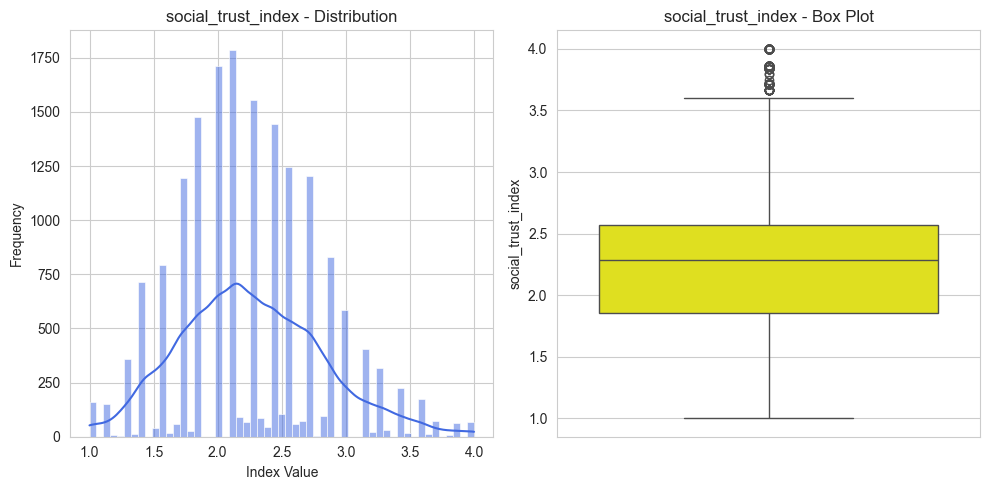

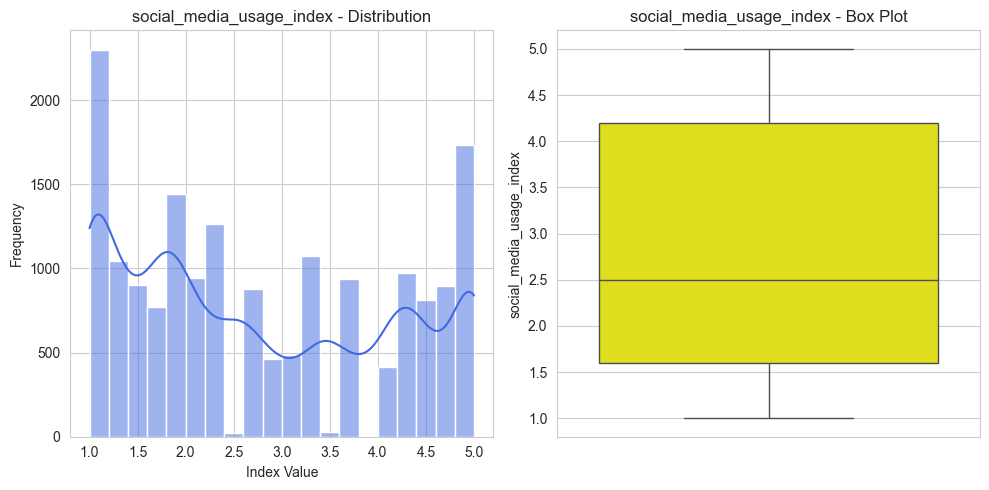

In [69]:
# Set a consistent style
sns.set_style('whitegrid')

# List of indices to plot
indices = ['social_trust_index', 'social_media_usage_index']

# Plot each index independently
for index in indices:
    plt.figure(figsize=(10, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_filtered[index], kde=True, color='royalblue')
    plt.title(f'{index} - Distribution')
    plt.xlabel('Index Value')
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_filtered[index], color='yellow')
    plt.title(f'{index} - Box Plot')

    plt.tight_layout()
    plt.show()



In [70]:
social_trust_data = df_filtered[[
    'Q57_trust_people',
    'Q58_trust_family',
    'Q59_trust_neighborhood',
    'Q60_trust_friends',
    'Q61_trust_new_people',
    'Q62_trust_people_another_religion',
    'Q63_trust_foreigners'
]]

alpha = pg.cronbach_alpha(social_trust_data)

print(f"Cronbach's Alpha for Social Trust Index: {alpha[0]:.3f}")  # internal consistency or reliability = acceptable


social_media_data = social_media_columns = df_filtered[['Q204_consume_mobilephone', 'Q205_consume_email', 
    'Q206_consume_internet', 'Q207_consume_socialmedia',
    'Q208_talk_with_friends_colleagues']
]

alpha2 = pg.cronbach_alpha(social_media_data)

print(f"Cronbach's Alpha for Social Media Index: {alpha2[0]:.3f}")






Cronbach's Alpha for Social Trust Index: 0.769
Cronbach's Alpha for Social Media Index: 0.863


In [71]:
df_filtered['polarization_index'] = abs(df_filtered['Q240_placement_left_right'] - 5.5)  #creation of polarization index based on extremity score *Political leaning - 5.5*

df_filtered

C:\Users\carme\AppData\Local\Temp\ipykernel_14620\2597087340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['polarization_index'] = abs(df_filtered['Q240_placement_left_right'] - 5.5)  #creation of polarization index based on extremity score *Political leaning - 5.5*


,a_study,a_year,country,s025,Q57_trust_people,Q58_trust_family,Q59_trust_neighborhood,Q60_trust_friends,Q61_trust_new_people,Q62_trust_people_another_religion,...,age_group,Q57_trust_question_rescaled,social_trust_index,Q204_consume_mobilephone_rescaled,Q205_consume_email_rescaled,Q206_consume_internet_rescaled,Q207_consume_socialmedia_rescaled,Q208_talk_with_friends_colleagues_rescaled,social_media_usage_index,polarization_index
0,2,2018,ECU,2182018,1.0,4.0,3.0,3.0,2.0,2.0,...,18-29,1.0,2.428571,3.0,3.0,3.0,3.0,2.0,2.8,0.5
1,2,2018,ECU,2182018,1.0,4.0,3.0,3.0,1.0,1.0,...,45-59,1.0,2.000000,3.0,2.0,1.0,1.0,1.0,1.6,0.5
2,2,2018,ECU,2182018,1.0,4.0,1.0,3.0,2.0,3.0,...,18-29,1.0,2.428571,1.0,2.0,1.0,1.0,1.0,1.2,0.5
3,2,2018,ECU,2182018,1.0,4.0,1.0,1.0,2.0,2.0,...,30-44,1.0,1.714286,5.0,3.0,3.0,2.0,2.0,3.0,0.5
4,2,2018,ECU,2182018,1.0,3.0,3.0,3.0,3.0,3.0,...,30-44,1.0,2.714286,1.0,1.0,2.0,1.0,2.0,1.4,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17434,2,2021,VEN,8622021,2.0,4.0,3.0,4.0,3.0,3.0,...,60-74,4.0,3.285714,1.0,2.0,1.0,1.0,2.0,1.4,3.5
17435,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,2.0,2.0,...,18-29,1.0,2.285714,1.0,5.0,1.0,1.0,1.0,1.8,4.5
17436,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,1.0,1.0,...,18-29,1.0,1.857143,1.0,5.0,1.0,1.0,1.0,1.8,0.5
17437,2,2021,VEN,8622021,1.0,3.0,3.0,3.0,2.0,2.0,...,45-59,1.0,2.285714,1.0,5.0,2.0,2.0,1.0,2.2,1.5


In [72]:
# Eliminar filas con valores NaN en los índices
df_filtered = df_filtered.dropna(subset=['polarization_index', 'social_trust_index', 'social_media_usage_index'])

# Aplicar normalización Min-Max
scaler = MinMaxScaler()
df_filtered[['polarization_norm', 'social_trust_norm', 'digital_media_norm']] = scaler.fit_transform(
    df_filtered[['polarization_index', 'social_trust_index', 'social_media_usage_index']]
)

print(df_filtered[['polarization_norm', 'social_trust_norm', 'digital_media_norm']].head())


   polarization_norm  social_trust_norm  digital_media_norm
0                0.0           0.476190                0.45
1                0.0           0.333333                0.15
2                0.0           0.476190                0.05
3                0.0           0.238095                0.50
4                0.0           0.571429                0.10


C:\Users\carme\AppData\Local\Temp\ipykernel_14620\1668753844.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['polarization_norm', 'social_trust_norm', 'digital_media_norm']] = scaler.fit_transform(
C:\Users\carme\AppData\Local\Temp\ipykernel_14620\1668753844.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['polarization_norm', 'social_trust_norm', 'digital_media_norm']] = scaler.fit_transform(
C:\Users\carme\AppData\Local\Temp\ipykernel_14620\1668753844.py:6: SettingWithCopy

In [73]:
# df_filtered = df_filtered.dropna(subset=['polarization_index', 'social_trust_index', 'social_media_usage_index'])

# df_filtered['polarization_zscore'] = zscore(df_filtered['polarization_index'])  #z-normalization applied in each indexes. 
# df_filtered['social_trust_zscore'] = zscore(df_filtered['social_trust_index'])
# df_filtered['digital_media_zscore'] = zscore(df_filtered['social_media_usage_index'])


# print(df_filtered[['polarization_zscore', 'social_trust_zscore', 'digital_media_zscore']].head())

# df_filtered



In [74]:


# df_filtered[['polarization_zscore', 'social_trust_zscore', 'digital_media_zscore']].describe()




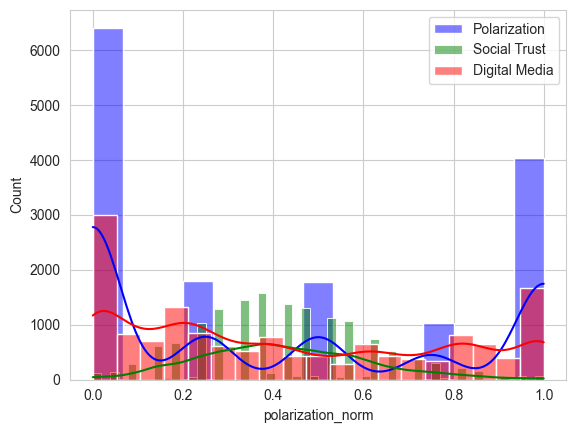

In [75]:

#pls adjust the label of the graph***
# sns.histplot(df_filtered['polarization_zscore'], kde=True, color='blue', label='Polarization')
# sns.histplot(df_filtered['social_trust_zscore'], kde=True, color='green', label='Social Trust')
# sns.histplot(df_filtered['digital_media_zscore'], kde=True, color='red', label='Digital Media')
# plt.legend()
# plt.show()

sns.histplot(df_filtered['polarization_norm'], kde=True, color='blue', label='Polarization')
sns.histplot(df_filtered['social_trust_norm'], kde=True, color='green', label='Social Trust')
sns.histplot(df_filtered['digital_media_norm'], kde=True, color='red', label='Digital Media')
plt.legend()
plt.show()

                    polarization_norm  social_trust_norm  digital_media_norm
polarization_norm            1.000000           0.019023            0.030829
social_trust_norm            0.019023           1.000000           -0.134945
digital_media_norm           0.030829          -0.134945            1.000000


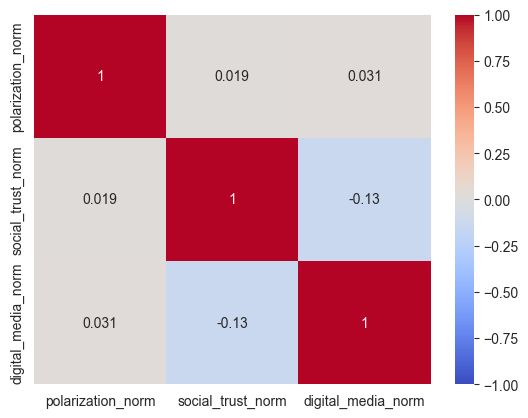

In [76]:
# correlation_matrix = df_filtered[['polarization_zscore', 'social_trust_zscore', 'digital_media_zscore']].corr()
# print(correlation_matrix)

# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.show()

correlation_matrix = df_filtered[['polarization_norm', 'social_trust_norm', 'digital_media_norm']].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()




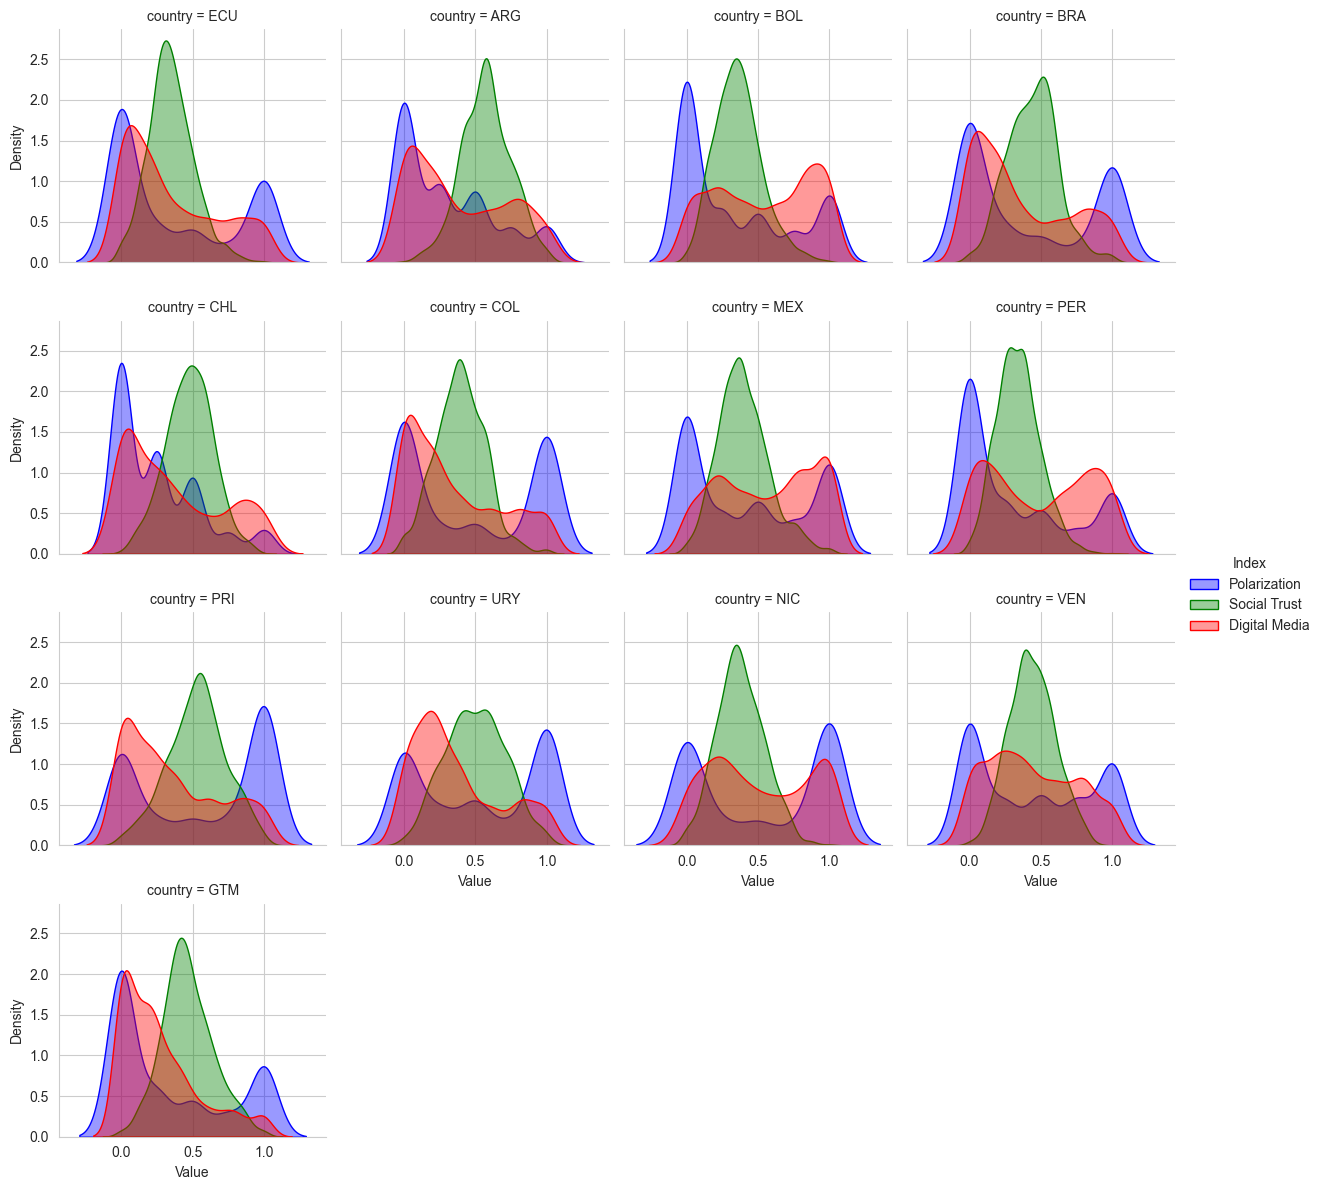

In [77]:

g = sns.FacetGrid(df_long, col="country", hue="Index", col_wrap=4, sharex=True, sharey=True, palette={'Polarization': 'blue', 'Social Trust': 'green', 'Digital Media': 'red'})
g.map(sns.kdeplot, "Value", fill=True, alpha=0.4)
g.add_legend()
plt.show()



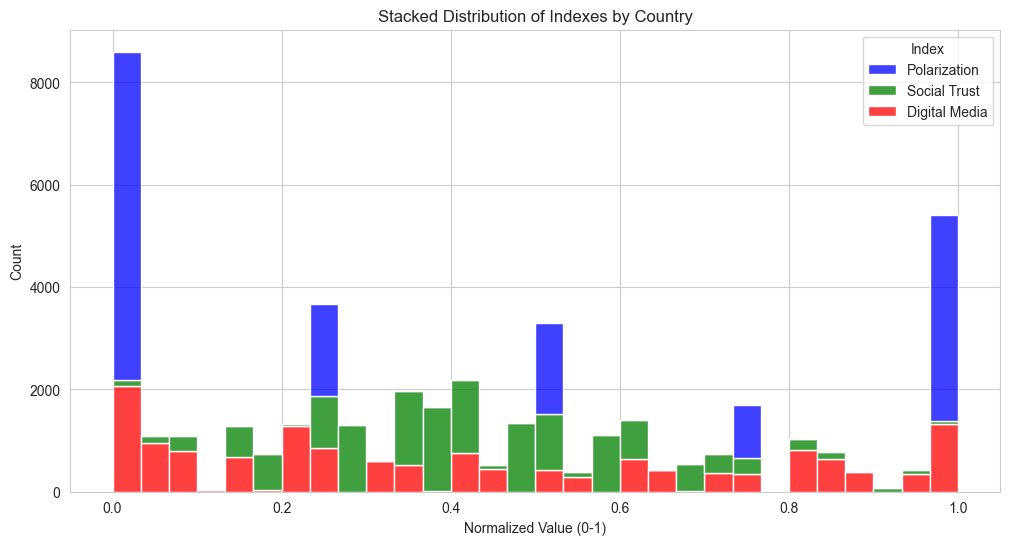

In [78]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_long, x="Value", hue="Index", multiple="stack", bins=30, palette={'Polarization': 'blue', 'Social Trust': 'green', 'Digital Media': 'red'})
plt.title('Stacked Distribution of Indexes by Country')
plt.xlabel('Normalized Value (0-1)')
plt.ylabel('Count')
plt.show()


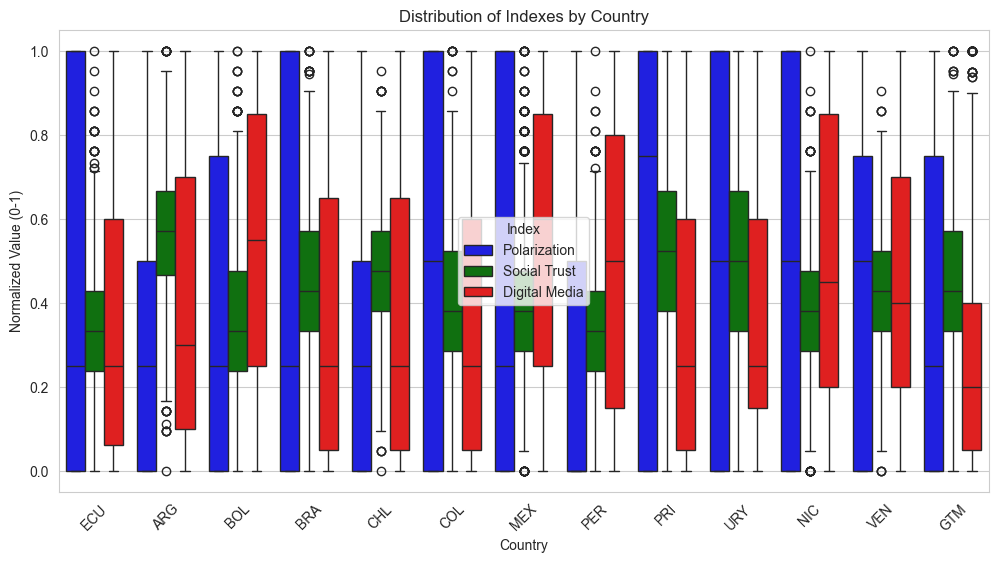

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='Value', hue='Index', data=df_long, palette={'Polarization': 'blue', 'Social Trust': 'green', 'Digital Media': 'red'})

plt.xticks(rotation=45)
plt.title('Distribution of Indexes by Country')
plt.ylabel('Normalized Value (0-1)')
plt.xlabel('Country')
plt.legend(title='Index')
plt.show()



In [80]:
df_filtered.head



<bound method NDFrame.head of        a_study  a_year country     s025  Q57_trust_people  Q58_trust_family  \
0            2    2018     ECU  2182018               1.0               4.0   
1            2    2018     ECU  2182018               1.0               4.0   
2            2    2018     ECU  2182018               1.0               4.0   
3            2    2018     ECU  2182018               1.0               4.0   
4            2    2018     ECU  2182018               1.0               3.0   
...        ...     ...     ...      ...               ...               ...   
17434        2    2021     VEN  8622021               2.0               4.0   
17435        2    2021     VEN  8622021               1.0               3.0   
17436        2    2021     VEN  8622021               1.0               3.0   
17437        2    2021     VEN  8622021               1.0               3.0   
17438        2    2021     VEN  8622021               2.0               4.0   

       Q59_trust_neig

In [81]:

political_groups = df_filtered['Q240_placement_left_right'].unique()

for group in political_groups:
    subset = df_filtered[df_filtered['Q240_placement_left_right'] == group]
    corr_matrix = subset[[ 'social_trust_norm', 'digital_media_norm']].corr()
    
    print(f"Correlation matrix for {group} political leaning:")
    print(corr_matrix, "\n")


Correlation matrix for 5.0 political leaning:
                    social_trust_norm  digital_media_norm
social_trust_norm            1.000000           -0.137237
digital_media_norm          -0.137237            1.000000 

Correlation matrix for 7.0 political leaning:
                    social_trust_norm  digital_media_norm
social_trust_norm            1.000000           -0.102478
digital_media_norm          -0.102478            1.000000 

Correlation matrix for 6.0 political leaning:
                    social_trust_norm  digital_media_norm
social_trust_norm            1.000000           -0.126915
digital_media_norm          -0.126915            1.000000 

Correlation matrix for 3.0 political leaning:
                    social_trust_norm  digital_media_norm
social_trust_norm            1.000000           -0.161735
digital_media_norm          -0.161735            1.000000 

Correlation matrix for 10.0 political leaning:
                    social_trust_norm  digital_media_norm
social_

In [82]:
# Asumiendo que df_filtered es el dataframe limpio que quieres exportar
df_filtered.to_csv('cleaned_data.csv', index=False)

# Mensaje para confirmar la exportación
print("Dataset exported successfully as 'cleaned_data.csv'")


Dataset exported successfully as 'cleaned_data.csv'
